# Basic EDA SSD


In [2]:
!ls

01_eda_x3views.ipynb  02_eda_sarship.ipynb


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import os
from load_data import show_image,show_image_with_annotations

In [3]:
!ls ./data/HRSID_JPG/HRSID_JPG/JPEGImages | head -n 5

P0001_0_800_10190_10990.jpg
P0001_0_800_7200_8000.jpg
P0001_0_800_8400_9200.jpg
P0001_0_800_9000_9800.jpg
P0001_0_800_9600_10400.jpg
ls: write error: Broken pipe


In [4]:
dataset_dir = './data/HRSID_JPG/HRSID_JPG'
annotations_path = os.path.join(dataset_dir, 'annotations/train_test2017.json')
images_path = os.path.join(dataset_dir, 'JPEGImages')

# Carga de anotaciones e imágenes
with open(annotations_path, 'r') as f:
    annotations = json.load(f)

In [11]:
image_file = 'P0001_1200_2000_9600_10400.jpg'

# EDA

## show_image

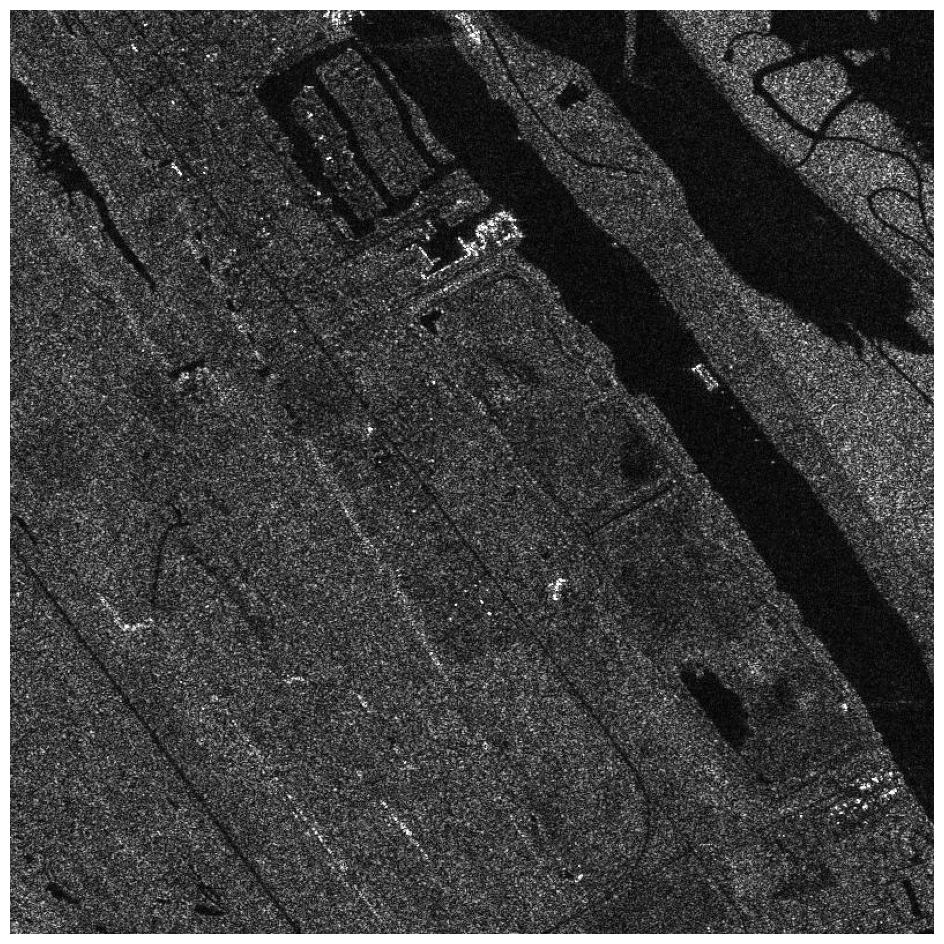

In [12]:
show_image(os.path.join(images_path, image_file))

## show_image_with_annotations

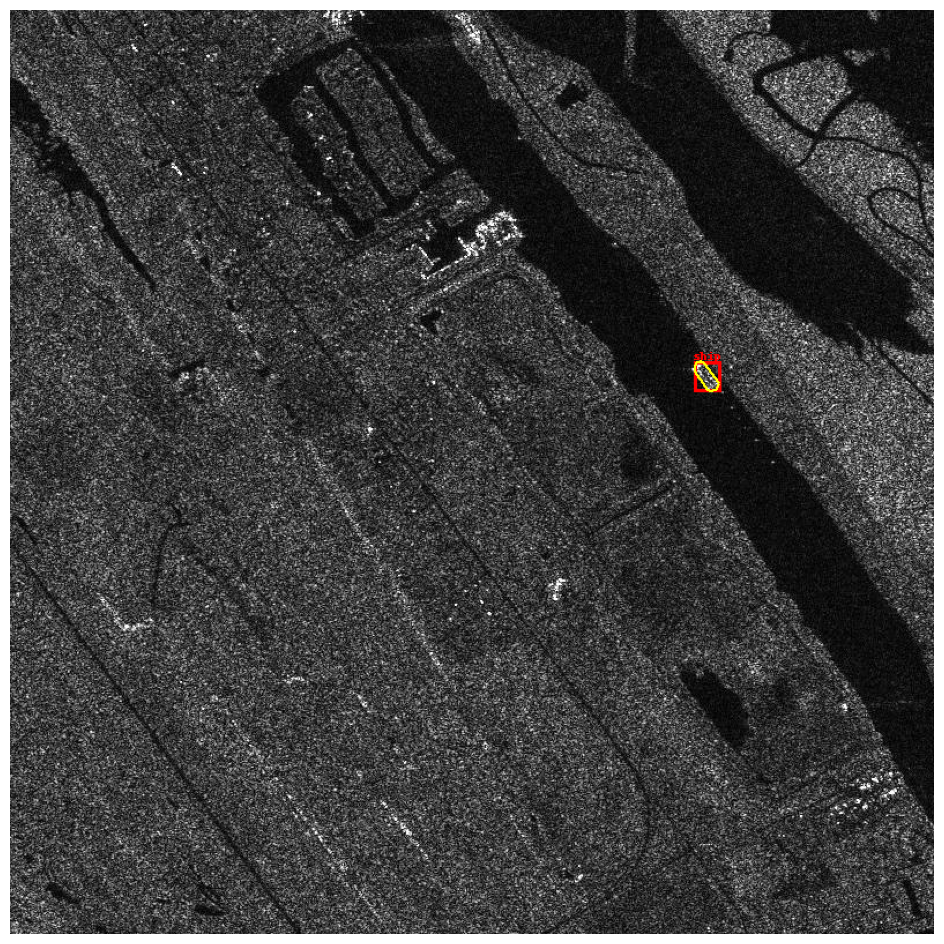

In [13]:
show_image_with_annotations(images_path, image_file, annotations)


In [15]:
def count_ships(annotations):
    """Cuenta el número total de barcos presentes en el conjunto de datos."""
    return len(annotations['annotations'])

print("Total de barcos presentes:", count_ships(annotations))


Total de barcos presentes: 16951


In [16]:
def calculate_areas(annotations):
    total_image_area = sum(image['width'] * image['height'] for image in annotations['images'])
    total_ship_area = sum(anno['area'] for anno in annotations['annotations'])
    return total_image_area, total_ship_area

total_image_area, total_ship_area = calculate_areas(annotations)
print("Área total de imágenes:", total_image_area)
print("Área total ocupada por barcos:", total_ship_area)


Área total de imágenes: 3586560000
Área total ocupada por barcos: 13209464.0


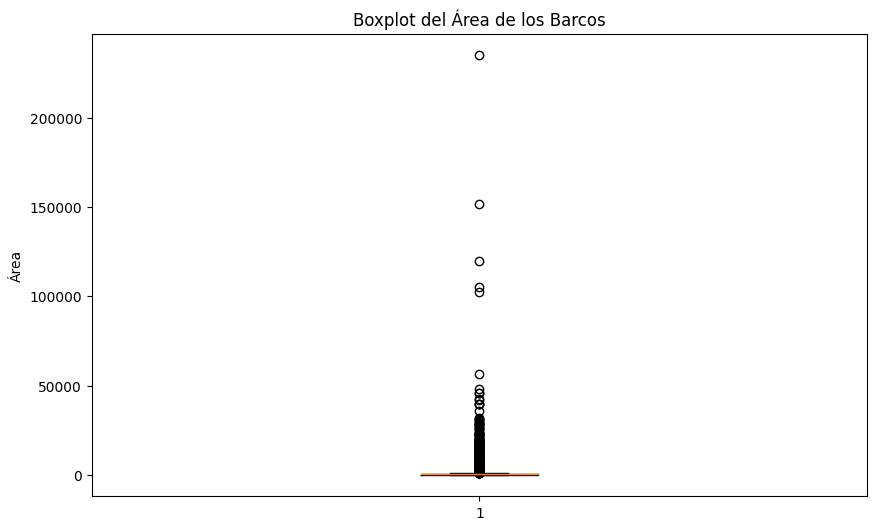

Cantidad de imágenes en el conjunto de entrenamiento: 3642
Cantidad de imágenes en el conjunto de prueba: 1962
Cantidad total de barcos: 16969


In [18]:
import json
import pandas as pd
import matplotlib.pyplot as plt

def load_annotations(path):
    """Carga las anotaciones desde un archivo JSON."""
    with open(path, 'r') as f:
        data = json.load(f)
    return data

def create_dataset_from_annotations(annotations):
    """Crea un DataFrame a partir de las anotaciones de los barcos."""
    rows = []
    for annotation in annotations['annotations']:
        row = {
            'image_id': annotation['image_id'],
            'category_id': annotation['category_id'],
            'area': annotation['area'],
            # Agregar más campos según sea necesario
        }
        rows.append(row)
    return pd.DataFrame(rows)

# Rutas a los archivos de anotaciones (ajustar según sea necesario)
train_annotations_path = 'data/HRSID_JPG/HRSID_JPG/annotations/train2017.json'
test_annotations_path = 'data/HRSID_JPG/HRSID_JPG/annotations/test2017.json'

# Carga las anotaciones
train_annotations = load_annotations(train_annotations_path)
test_annotations = load_annotations(test_annotations_path)

# Crea datasets
train_df = create_dataset_from_annotations(train_annotations)
test_df = create_dataset_from_annotations(test_annotations)

# Concatena ambos DataFrames para tener un dataset completo
full_df = pd.concat([train_df, test_df])

# Boxplot del área de los barcos
plt.figure(figsize=(10, 6))
plt.boxplot(full_df['area'])
plt.title('Boxplot del Área de los Barcos')
plt.ylabel('Área')
plt.show()

# Información adicional basada en tus preguntas
print(f"Cantidad de imágenes en el conjunto de entrenamiento: {len(train_annotations['images'])}")
print(f"Cantidad de imágenes en el conjunto de prueba: {len(test_annotations['images'])}")
print(f"Cantidad total de barcos: {len(full_df)}")


In [22]:
def count_ship_sizes(annotations, threshold=10000):
    """Cuenta los barcos grandes y pequeños basado en un umbral de área."""
    large_ships = sum(1 for anno in annotations['annotations'] if anno['area'] > threshold)
    small_ships = len(annotations['annotations']) - large_ships
    return large_ships, small_ships

large_ships, small_ships = count_ship_sizes(annotations)
print("Barcos grandes:", large_ships)
print("Barcos pequeños:", small_ships)

Barcos grandes: 133
Barcos pequeños: 16818
